In [1]:
import mysql.connector
import pandas as pd
import datetime
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb as db

import numpy as np

In [2]:
#### GNC ####
CAMPAIGN_ID = 23843180432940316
date_12 = datetime.date(2018,11,12)
date_13 = datetime.date(2018,11,13)
minute = datetime.time(11,59,20).minute

In [3]:
def connectDB(db_name):
    mydb = mysql.connector.connect(
        host="localhost", 
        user="root",
        passwd="adgeek1234",
        database=db_name
    )
    return mydb
mydb = connectDB("ad_activity")
df_camp = pd.read_sql( "SELECT * FROM by_campaign where campaign_id = %s" %(CAMPAIGN_ID), con=mydb)

df_gnc = df_camp[(df_camp.request_time.dt.date == date_12) | (df_camp.request_time.dt.date == date_13)]
df_gnc = df_gnc[(df_gnc.request_time.dt.minute == minute)]

In [4]:
#### 蜂主義 ####
CAMPAIGN_ID = 23843052139470246
date_12 = datetime.date(2018,11,12)
date_13 = datetime.date(2018,11,13)
minute = datetime.time(11,59,20).minute

In [5]:
def connectDB(db_name):
    mydb = mysql.connector.connect(
        host="localhost", 
        user="root",
        passwd="adgeek1234",
        database=db_name
    )
    return mydb
mydb = connectDB("ad_activity")
df_camp = pd.read_sql( "SELECT * FROM by_campaign where campaign_id = %s" %(CAMPAIGN_ID), con=mydb)

df_feng = df_camp[(df_camp.request_time.dt.date == date_12) | (df_camp.request_time.dt.date == date_13)]
df_feng = df_feng[(df_feng.request_time.dt.minute == minute)]

In [6]:
#### 善住 #####
CAMPAIGN_ID = 23843085681850632
date_12 = datetime.date(2018,11,12)
date_13 = datetime.date(2018,11,13)
minute = datetime.time(11,59,20).minute

In [7]:
def connectDB(db_name):
    mydb = mysql.connector.connect(
        host="localhost", 
        user="root",
        passwd="adgeek1234",
        database=db_name
    )
    return mydb
mydb = connectDB("ad_activity")
df_camp = pd.read_sql( "SELECT * FROM by_campaign where campaign_id = %s" %(CAMPAIGN_ID), con=mydb)

df_shan = df_camp[(df_camp.request_time.dt.date == date_12) | (df_camp.request_time.dt.date == date_13)]
df_shan = df_shan[(df_shan.request_time.dt.minute == minute)]

In [8]:
def connectDB(db_name):
    mydb = mysql.connector.connect(
        host="localhost", 
        user="root",
        passwd="adgeek1234",
        database=db_name
    )
    return mydb
mydb = connectDB("ad_activity")
df_camp = pd.read_sql( "SELECT * FROM by_campaign where campaign_id = %s" %(CAMPAIGN_ID), con=mydb)

In [9]:
frames = [df_gnc, df_shan, df_feng]

In [10]:
result = pd.concat(frames)

In [11]:
len(result)

314

In [12]:
def make_train(df):
    df['ratio'] = df['clicks'] / df['impressions']
    df.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
    adid_list=df['ad_id'].unique()
    ad_list = []

    df_concat=pd.DataFrame(columns=df.columns)
    
    for ad in adid_list:
        df_tmp = df[df.ad_id==ad]
        if len(df_tmp) > 3:
            for i in range( 1,len( df_tmp ) ):
                df_tmp['clicks'].iloc[i-1] = df_tmp['clicks'].iloc[i] - df_tmp['clicks'].iloc[i-1]
                df_tmp['impressions'].iloc[i-1] = df_tmp['impressions'].iloc[i] - df_tmp['impressions'].iloc[i-1]
                df_tmp['reach'].iloc[i-1] = df_tmp['reach'].iloc[i] - df_tmp['reach'].iloc[i-1]
            df_concat=pd.concat([df_concat,df_tmp], ignore_index=True)

    for i in range(len(df['clicks'])):
        if df_concat['clicks'].iloc[i]==0:
            df_concat['clicks'].iloc[i]=df_concat['impressions'].iloc[i]*0.05
    
    for i in range(len(df['clicks'])):
        if df_concat['cpc'].iloc[i]==0:
            df_concat['cpc'].iloc[i]=np.mean(df['cpc'])
        
    df_drop = df_concat.drop(['age_max','age_min','flexible_spec','geo_locations', 'ratio', 'total_clicks','spend_cap', 'objective', 'start_time', 'stop_time', 'adset_id','campaign_id','avgspeed', 'speed'],axis=1)
    df_drop = df_drop.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
    
    df_drop['request_time'] = pd.to_datetime(df_drop['request_time'], infer_datetime_format=True)
    hour = pd.get_dummies(df_drop['request_time'].dt.hour)
    train = pd.concat( [df_drop, hour] ,axis=1)
    train = train.reset_index(drop=True)
    
    return train

In [13]:
TRAIN = make_train(result)
TRAIN.head(3)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A va

,ad_id,cpc,clicks,impressions,reach,bid_amount,daily_budget,request_time,0,1,...,14,15,16,17,18,19,20,21,22,23
0,23843052139410246,3.00000,3,74,74,9,200,2018-11-12 18:59:15,0,0,...,0,0,0,0,1,0,0,0,0,0
1,23843052139410246,1.71429,12,319,319,9,200,2018-11-12 19:59:17,0,0,...,0,0,0,0,0,1,0,0,0,0
2,23843052139410246,2.15790,3,42,42,9,200,2018-11-12 20:59:17,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import random

In [15]:
adid_list = TRAIN['ad_id'].unique()

In [16]:
train_x=pd.DataFrame(columns=TRAIN.columns)
train_X=pd.DataFrame(columns=TRAIN.columns)
train_Xs=pd.DataFrame()
dfs=[]
for i in range(len(adid_list)):
    print(adid_list[i])
    train_x = TRAIN[(TRAIN.ad_id == adid_list[i]) ]
#     print(train_x.request_time.dt.hour)
    train_X = pd.concat( [ train_x.shift(1), train_x.shift(2), train_x.shift(3) ], axis=1, sort=False )

    train_X = train_X.dropna()
#     print(train_x['request_time'])
    train_X = train_X.drop(['request_time'], axis=1)

    train_Xs = pd.concat( [ train_Xs, train_X ],axis=0,sort=False)
    train_Xs = train_Xs.reset_index(drop=True)
    print('-----------------------',len(train_Xs))

23843052139410246
----------------------- 24
23843052139420246
----------------------- 48
23843052139440246
----------------------- 72
23843052139460246
----------------------- 95
23843052139490246
----------------------- 118
23843052139520246
----------------------- 140
23843085681860632
----------------------- 166
23843085681870632
----------------------- 192
23843180432910316
----------------------- 197
23843180432920316
----------------------- 206
23843180432930316
----------------------- 213
23843180432950316
----------------------- 221
23843180432960316
----------------------- 229
23843180432980316
----------------------- 240
23843180432990316
----------------------- 249
23843180433050316
----------------------- 266


In [17]:
len(train_Xs)

266

In [18]:
train_y=[]
train_Y=pd.DataFrame(columns=TRAIN.columns)
for i in range(len(adid_list)):
    print(adid_list[i])
    train_y = TRAIN[(TRAIN.ad_id == adid_list[i]) ]
#     print(train_y.request_time.dt.hour)
#     train_y = train_y[(TRAIN.ad_id == adid_list[i]) & (TRAIN.request_time.dt.hour != 1)]
#     train_y = train_y[(TRAIN.ad_id == adid_list[i]) & (TRAIN.request_time.dt.hour != 2)]
#     print(train.request_time.dt.hour)
#     train_y.drop(train_y.tail(3).index,inplace=True)
    train_y.drop(train_y.head(3).index,inplace=True)
    train_Y = pd.concat( [ train_Y, train_y ], ignore_index=True,sort=False )
    print('-----------------------',len(train_Y))
    train_Y = train_Y.drop(['request_time'], axis=1)
#     train_Y = train_Y.dropna()
train_Y = train_Y.reset_index(drop=True)
train_Y.head()

23843052139410246
----------------------- 24
23843052139420246
----------------------- 48
23843052139440246
----------------------- 72
23843052139460246
----------------------- 95
23843052139490246


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


----------------------- 118
23843052139520246
----------------------- 140
23843085681860632
----------------------- 166
23843085681870632
----------------------- 192
23843180432910316
----------------------- 197
23843180432920316
----------------------- 206
23843180432930316
----------------------- 213
23843180432950316
----------------------- 221
23843180432960316
----------------------- 229
23843180432980316
----------------------- 240
23843180432990316
----------------------- 249
23843180433050316
----------------------- 266


,ad_id,cpc,clicks,impressions,reach,bid_amount,daily_budget,0,1,2,...,14,15,16,17,18,19,20,21,22,23
0,23843052139410246,2.409090,4,72,68,9,200,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,23843052139410246,2.730770,2,68,72,9,200,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,23843052139410246,2.785710,-28,-581,-581,9,200,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23843052139410246,3.030127,0.1,2,2,9,200,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23843052139410246,3.030127,0,0,0,9,200,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train_Xs['ad_id'].iloc[0,0]

23843052139410246

In [20]:
train_Xs = train_Xs.drop(['ad_id'], axis=1)
train_Y = train_Y.drop(['ad_id'], axis=1)

In [21]:
test_X = train_Xs.iloc[:21,:]
train_X = train_Xs.iloc[21:,:]

In [22]:
test_Y = train_Y.iloc[:21,:]
train_Y = train_Y.iloc[21:,:]

In [23]:
train_Y.columns

Index([         'cpc',       'clicks',  'impressions',        'reach',
         'bid_amount', 'daily_budget',              0,              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23],
      dtype='object')

In [39]:
def scaleData(train_X , train_Y):
    from sklearn.preprocessing import StandardScaler
    train_X_arr = train_X.values
    train_Y_arr = train_Y[['cpc','clicks']].values
#     train_Y_arr = train_Y[['clicks','cpc']].values
    #train_Y_arr = train_Y_arr.reshape(-1,1)

    scalerX = StandardScaler().fit(train_X_arr)
    scaled_X = scalerX.transform(train_X_arr)
    scalerY = StandardScaler().fit(train_Y_arr)
    scaled_Y = scalerY.transform(train_Y_arr)
    return scalerX, scaled_X, scalerY, scaled_Y

In [40]:
scalerX, scaled_X, scalerY, scaled_Y = scaleData(train_X , train_Y[['cpc','clicks']] )

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
from sklearn.externals import joblib
scalerX_filename = "IT_stateful_scalerX.pkl"
scalerY_filename = "IT_stateful_scalerY.pkl"
joblib.dump(scalerX, scalerX_filename) 
joblib.dump(scalerY, scalerY_filename) 

['IT_stateful_scalerY.pkl']

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers, metrics
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.externals import joblib 

BATCH_SIZE = 1
ITERATION = 10
EPOCH = 500
NEURONS = 128
MODEL_NAME = 'IT_test_cpc_' +  str(ITERATION) + '_' + str(EPOCH) + '_' + str(NEURONS) + '.h5'


In [43]:
def create_model(train, target, batch_size, iteration, neurons, epoch):
    x, y = train, target
    x = train.reshape(train.shape[0], 1, train.shape[1])
    #x = train.values.reshape(train.shape[0], 1, train.shape[1])
    
    model = Sequential()
    model.add(LSTM( int(neurons) , batch_input_shape=(batch_size, x.shape[1], x.shape[2]), stateful = True, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(neurons, batch_input_shape=(batch_size, x.shape[1], x.shape[2]), stateful=True))
    model.add(Dropout(0.2))
    model.add(Dense(target.shape[1]))
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    es = EarlyStopping(monitor='val_loss', patience=10)
#     history = model.fit(x, y, epochs=EPOCH, batch_size=batch_size, verbose=1, shuffle=False, validation_split=0.2, callbacks=[es])
#     plt.plot(history.history['val_loss'], 'r')
    
    for i in range(iteration):
        print('====round', str(i) +  '/' + str(iteration))
        history = model.fit(x, y, epochs=EPOCH, batch_size=batch_size,
                  verbose=1, shuffle=False, validation_split=0.2, callbacks=[es])
        #plt.plot(history.history['val_loss'], 'r')
        model.reset_states()
    model.save(MODEL_NAME)
    return model, history

In [44]:
%%time
model, history = create_model(scaled_X,scaled_Y, BATCH_SIZE, ITERATION, NEURONS, EPOCH)

====round 0/10
Train on 196 samples, validate on 49 samples
Epoch 1/500
196/196 [==============================] - 2s 11ms/step - loss: 1.0403 - mean_squared_error: 1.0403 - val_loss: 1.8842 - val_mean_squared_error: 1.8842
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 0.9376 - mean_squared_error: 0.9376 - val_loss: 0.9605 - val_mean_squared_error: 0.9605
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 0.8846 - mean_squared_error: 0.8846 - val_loss: 1.1126 - val_mean_squared_error: 1.1126
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 0.8619 - mean_squared_error: 0.8619 - val_loss: 1.0049 - val_mean_squared_error: 1.0049
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 0.8000 - mean_squared_error: 0.8000 - val_loss: 0.8770 - val_mean_squared_error: 0.8770
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 0.7960 - mean_squared_error: 0.7960 - val_loss: 0

196/196 [==============================] - 1s 4ms/step - loss: 0.3777 - mean_squared_error: 0.3777 - val_loss: 0.6009 - val_mean_squared_error: 0.6009
Epoch 2/500
196/196 [==============================] - 1s 3ms/step - loss: 0.6001 - mean_squared_error: 0.6001 - val_loss: 0.6565 - val_mean_squared_error: 0.6565
Epoch 3/500
196/196 [==============================] - 1s 3ms/step - loss: 0.1851 - mean_squared_error: 0.1851 - val_loss: 0.7777 - val_mean_squared_error: 0.7777
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.8478 - val_mean_squared_error: 0.8478
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1249 - mean_squared_error: 0.1249 - val_loss: 0.6659 - val_mean_squared_error: 0.6659
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.6758 - val_mean_squared_error: 0.6758
Epoch 7/500
196/196 [=============

196/196 [==============================] - 1s 7ms/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.6618 - val_mean_squared_error: 0.6618
Epoch 7/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.6884 - val_mean_squared_error: 0.6884
Epoch 8/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.7114 - val_mean_squared_error: 0.7114
Epoch 9/500
196/196 [==============================] - 1s 8ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.6011 - val_mean_squared_error: 0.6011
Epoch 10/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.6477 - val_mean_squared_error: 0.6477
Epoch 11/500
196/196 [==============================] - 1s 5ms/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.7439 - val_mean_squared_error: 0.7439
Epoch 12/500
196/196 [==========

In [ ]:
MODEL_NAME = '/storage/opt_project_test/optProjectTest/optProjectTest/models/IT_test_cpc_20_500_128(1).h5'
# MODEL_NAME = 'IT_stateful_alldata_20_500_128.h5'

In [45]:
def evaluateModel(test_X,test_Y, scalerX, scalerY):
    #load model and scaler
    model = load_model(MODEL_NAME)
    
    
    
    
#     scalerX = joblib.load(scalerX_filename) 
#     scalerY = joblib.load(scalerY_filename)     
    
    test_X = scalerX.transform(test_X)

    test_X = test_X.reshape(test_X.shape[0],1,test_X.shape[1])
    pred_click, pred_cpc = [], []
    for i,arr in enumerate(test_X):
        ans = model.predict(test_X[i:i+1,:,:])
        ans = scalerY.inverse_transform(ans)
        print(ans)
#         pred_click.append(ans[0,0])
#         pred_cpc.append(ans[0,1])
        pred_cpc.append(ans[0])
    pred = pd.DataFrame({'pred_cpc':pred_cpc})
#     pred = pd.DataFrame({'pred_click':pred_click,'pred_cpc':pred_cpc})
    ans = pd.DataFrame(data=ans)
    frm = [pred,test_Y.reset_index(drop=True)]
    pred = pd.concat(frm,axis=1,sort=False)
    
#     pred['delta_click'] = pred['pred_click']-pred['clicks']
    pred['delta_cpc'] = pred['pred_cpc']-pred['cpc']
    return pred

In [46]:
pred = evaluateModel(test_X, test_Y[['cpc','clicks']], scalerX, scalerY)
# print(pred.columns)
# pred[['pred_click', 'clicks', 'delta_click' , 'pred_cpc' , 'cpc', 'delta_cpc', 'impressions']]
# pred[['pred_cpc' , 'cpc', 'delta_cpc', 'impressions']]
pred.head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


[[2.469265 1.642663]]
[[3.2114997 2.6662774]]
[[ 3.1555293 -5.604941 ]]
[[3.0219605 1.7556424]]
[[3.0293248 1.8716655]]
[[2.7134564 2.3665237]]
[[3.3176985 2.3582006]]
[[3.1122851 2.2961202]]
[[3.1044636 3.1125593]]
[[2.8914883 1.1842041]]
[[3.4653516 3.1190562]]
[[4.137681  1.4575324]]
[[ 4.1627474 -6.858484 ]]
[[3.4724822  0.01020193]]
[[3.2318752 2.824152 ]]
[[3.1243923  0.76664925]]
[[3.1463776 1.660398 ]]
[[3.2146268 2.3647718]]
[[3.2301497 1.7228856]]
[[3.10413 2.03554]]
[[3.00702   2.4279838]]


,pred_cpc,cpc,clicks,delta_cpc
0,"[2.469265, 1.642663]",2.409090,4,"[0.060174942, -0.76642704]"
1,"[3.2114997, 2.6662774]",2.730770,2,"[0.48072958, -0.0644927]"
2,"[3.1555293, -5.604941]",2.785710,-28,"[0.36981916, -8.390651]"
3,"[3.0219605, 1.7556424]",3.030127,0.1,"[-0.008166313, -1.2744844]"
4,"[3.0293248, 1.8716655]",3.030127,0,"[-0.0008020401, -1.1584613]"
5,"[2.7134564, 2.3665237]",3.030127,0.15,"[-0.31667042, -0.66360307]"
6,"[3.3176985, 2.3582006]",3.030127,0.3,"[0.28757167, -0.67192626]"
7,"[3.1122851, 2.2961202]",3.030127,2,"[0.08215833, -0.73400664]"
8,"[3.1044636, 3.1125593]",2.500000,1.35,"[0.6044636, 0.6125593]"
9,"[2.8914883, 1.1842041]",2.500000,1,"[0.3914883, -1.3157959]"


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

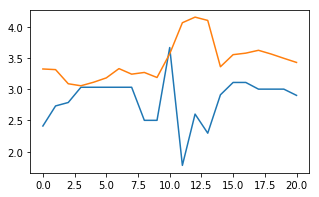

In [34]:
plt.figure(figsize=(5,3))
plt.plot(pred['cpc'])
plt.plot(pred['pred_cpc'])
# plt.plot(pred['delta_cpc'])

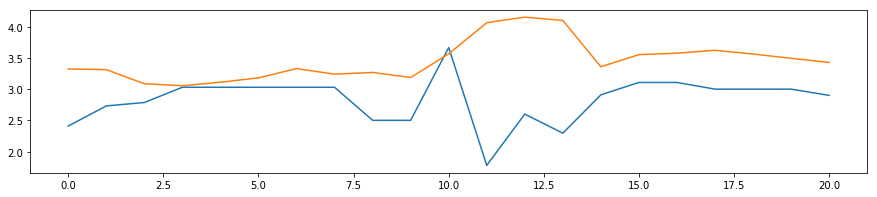

In [35]:
plt.figure(figsize=(15,3))
plt.plot(pred['cpc'])
plt.plot(pred['pred_cpc'])
# plt.plot(pred['delta_cpc'])

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(pred['cpc'])
plt.plot(pred['pred_cpc'])
# plt.plot(pred['delta_cpc'])

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(pred['cpc'])
plt.plot(pred['pred_cpc'])
# plt.plot(pred['delta_cpc'])

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(pred['cpc'])
plt.plot(pred['pred_cpc'])
# plt.plot(pred['delta_cpc'])

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(pred['cpc'].tail(200))
plt.plot(pred['pred_cpc'].tail(200))
# plt.plot(pred['delta_cpc'])

In [ ]:
train_Y[['impressions', 'daily_budget']].tail(200)

In [1]:
def normalized_sigmoid_fkt(a, b, x):
    s= 1/(1+np.exp(b*(x-a)))
    return s

In [12]:
3 * 0.8* ( normalized_sigmoid_fkt(a, b, 9) - 0.5 ) +3

1.7999999999999998

In [24]:
import matplotlib.pyplot as plt
import numpy as np
a = 1
b = 5
bid_range = 0.8
init_cpc = 12

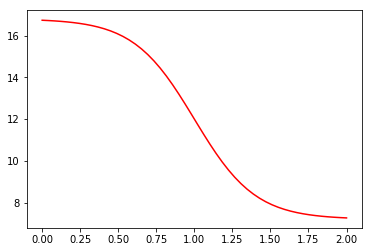

In [25]:

x = np.linspace(0, 2)
# x_new = np.linspace(0, 1)

tanh = np.linspace(0, 1)
y = normalized_sigmoid_fkt(a, b, x)
# for x_index in range(len(x)):
#     if x[x_index] >= 0.5:    
#         x_new[x_index]= 1 - x[x_index]
#         tanh[x_index] = init_cpc * bid_range * ( normalized_sigmoid_fkt(a, b, x_new[x_index]) - 0.5 ) + init_cpc
#     else:
#         tanh[x_index]  = init_cpc * bid_range * ( normalized_sigmoid_fkt(a, b, x_new[x_index]) - 0.5 ) + init_cpc
tanh = init_cpc * bid_range * ( normalized_sigmoid_fkt(a, b, x) - 0.5 ) + init_cpc
y1 = np.tanh(x)
plt.plot(x,tanh,label="Tanh", color = "red")
# plt.plot(x,y,label="Tanh", color = "blue")